### Simplifying multidimensional data

In [2]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

Looking at the sparrow data from Week 3

#### Tidying up the dataframe a bit

In [3]:
df = pd.read_csv('../Datasets/CAS_Swarth_Geospiza.csv')
df.head(3)

,Taxon,Institution,Museum No.,Island,Taxon-Island,New_Taxonomy,New_Taxonomy_Island,Sex,Wing,Tail,Blength,Bdepth,Bwidth,Tarsus
0,G. conirostris,Rotheschild Mus.,1916.0,Darwin,conirostrisDarwin,G. propinqua,propinquaDarwin,Male,78.2,46.0,19.5,14.0,11.0,25.2
1,G. conirostris,Rotheschild Mus.,1918.0,Darwin,conirostrisDarwin,G. propinqua,propinquaDarwin,Male,81.5,53.0,22.2,17.2,13.5,26.5
2,G. conirostris,Rotheschild Mus.,1931.0,Darwin,conirostrisDarwin,G. propinqua,propinquaDarwin,Male,81.0,49.5,21.2,16.2,12.2,23.5


In [4]:
df.shape

(486, 14)

In [5]:
df = df.dropna()

In [6]:
df.shape

(485, 14)

In [7]:
df.describe()

,Museum No.,Wing,Tail,Blength,Bdepth,Bwidth,Tarsus
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,5903.779381,69.556907,42.890722,16.181237,11.344330,9.005773,21.621443
std,3466.470112,6.609649,4.352336,3.660059,3.894019,2.704467,1.964613
min,104.000000,55.200000,33.500000,10.000000,6.200000,5.500000,17.000000
25%,5195.000000,64.000000,39.500000,12.500000,8.200000,7.000000,20.000000
50%,5409.000000,70.000000,42.500000,16.000000,10.000000,8.200000,21.500000
75%,5945.000000,73.000000,45.500000,18.500000,13.200000,10.200000,23.000000
max,37932.000000,86.500000,57.500000,26.000000,23.000000,17.000000,26.500000


Very variable metrics.  If we analyse as is, the metrics with high values will dominate.  We need to normalise.

In [8]:
df.columns

Index(['Taxon', 'Institution', 'Museum No.', 'Island', 'Taxon-Island',
       'New_Taxonomy', 'New_Taxonomy_Island', 'Sex', 'Wing', 'Tail', 'Blength',
       'Bdepth', 'Bwidth', 'Tarsus'],
      dtype='object')

In [9]:
X = df.loc[:, "Wing":]  # gathers ALL the gene columns, independent variables data

In [10]:
stX = StandardScaler().fit_transform(X) 

In [11]:
pca = PCA(n_components=5)
 
pca_features = pca.fit_transform(stX)

In [12]:
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])


In [13]:
pca_df.head(3)

,PC1,PC2,PC3,PC4,PC5
0,2.517080,0.685163,0.567906,0.462894,-0.204203
1,4.652966,0.776137,-0.109270,0.442145,0.368926
2,3.279317,0.126242,-0.352514,-0.281869,-0.308257


How much varience is explained by each PC?

In [14]:
pca.explained_variance_ratio_

array([0.87215956, 0.06098027, 0.03331567, 0.02293163, 0.00888051])

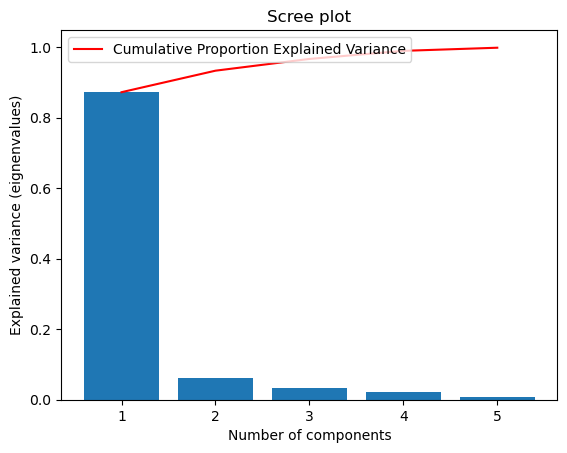

In [15]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ratio_)+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Proportion Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

We can plot the first two PCA (covering over 85% of the variation) to see if the species and tissues are separate.  We need to add back the labels.

In [16]:
pca_df['Taxon'] = df ['Taxon']

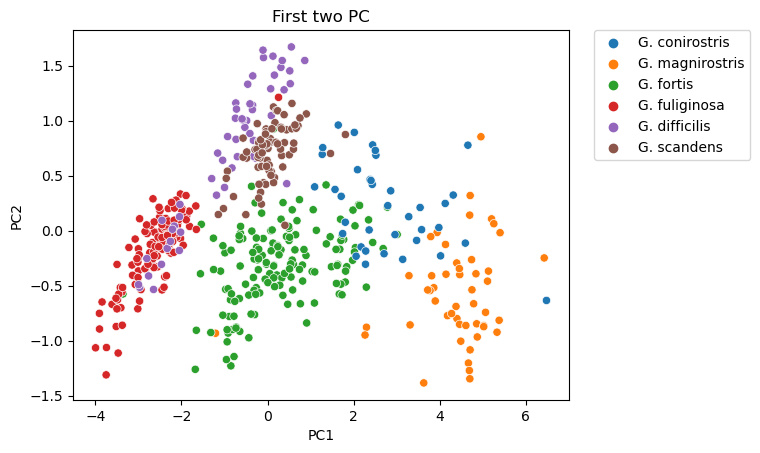

In [17]:
sns.scatterplot(x='PC1', 
                y='PC2',
                hue="Taxon",
                data=pca_df)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('First two PC')
plt.show()


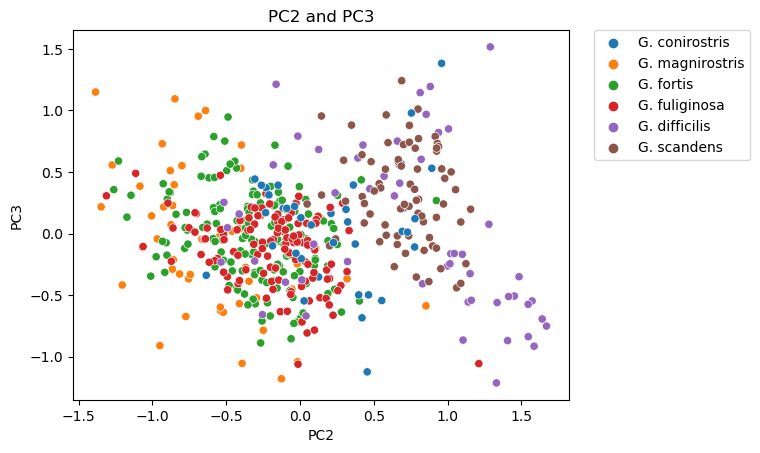

In [19]:
pca_df.head(3)

sns.scatterplot(x='PC2', 
                y='PC3',
                hue="Taxon",
                data=pca_df)
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PC2 and PC3')
plt.show()


We can plot as 3-D, capturing nearly 100% of the variation in the dataset of 6 metrics using just 3 axes.

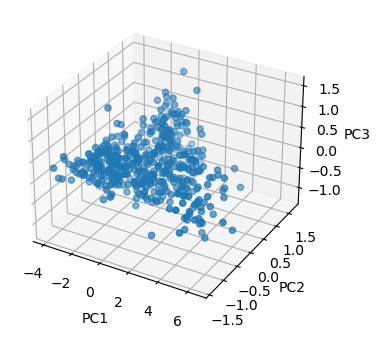

In [20]:
plt.figure (figsize = (5, 4))
seaborn_plot = plt.axes (projection='3d')
seaborn_plot.scatter3D (pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
seaborn_plot.set_xlabel ('PC1')
seaborn_plot.set_ylabel ('PC2')
seaborn_plot.set_zlabel ('PC3')
plt.show ()

What ARE the PC we have here?  pca_components_ shows the effect of each metric on each PC.  We can visulaise this as a heatmap

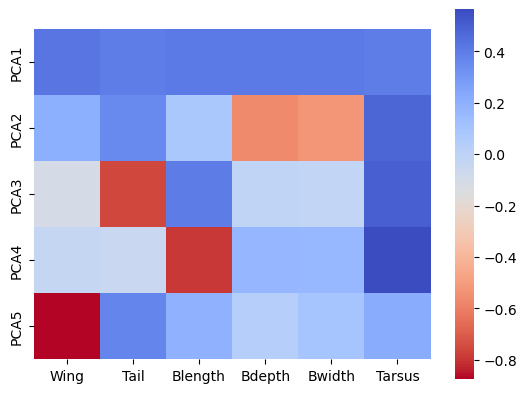

In [21]:
ax = sns.heatmap(pca.components_,
                 cmap= "coolwarm_r",
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "vertical"})
ax.set_aspect("equal")

### Biplot

Which metrics are driving the separation of the groups?  
Biplots are graphs that show:  

the scaled PCA scatterplots  
the loading plots 
vectors that show how strongly each feature influences the principal component.  

We can pull out each of these sets of data for PC1 and PC2

In [22]:
scores = pca_features[:,0:2]

In [23]:
loadings = np.transpose(pca.components_[0:2, :])

In [24]:
labels = list(X.columns)

In the cell below we set up a function to produce a biplot

In [25]:
def biplot(scores,loadings,labels):
    xs = scores[:,0]
    ys = scores[:,1]
    n = loadings.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,0], loadings[i,1],color = 'r',alpha = 0.5)
        plt.text(loadings[i,0]* 1.15, loadings[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

Now we plot the graph

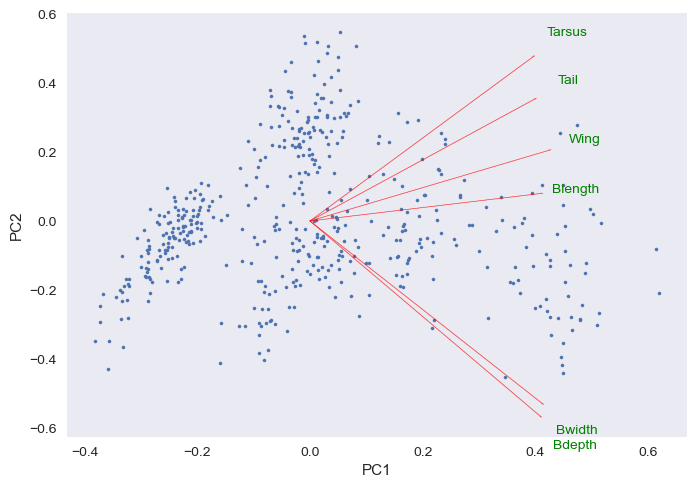

In [26]:
plt.style.use('seaborn')
biplot(scores ,loadings, labels)
plt.show()

Let's return to the plant terpene dataset from last week and see if PCA helps understand the variation there.

In [464]:
df = pd.read_csv('../Datasets/TPS.csv')
df.head(3)

,Gene,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,Female.flower.B.conchifolia.rep1,67.311275,0.0,15.645225,0.660818,0,0.0,0,0.0,0,...,0,22.447206,0,0,0.188740,1.391640,3.125789,0.0,0.940281,0
1,Female.flower.B.conchifolia.rep2,24.881496,0.0,3.396060,0.000000,0,0.0,0,0.0,0,...,0,13.809320,0,0,0.000000,0.964168,1.100803,0.0,0.000000,0
2,Female.flower.B.conchifolia.rep3,0.000000,0.0,4.865841,0.101612,0,0.0,0,0.0,0,...,0,3.518609,0,0,0.437499,0.910456,0.333213,0.0,0.000000,0


Tidy up as we did before and split the dataframe into dependant and independant.   

In [465]:
new = df["Gene"].str.split(".B.|.rep", n = 2, expand = True)
# Dropping old Name columns
df.drop(columns =["Gene"], inplace = True)
df.insert(0,'Tissue', new[0] )
df.insert(0,'Species', new[1] )
df.insert(0,'Rep', new[2] )

X = df.loc[:, "Bcon1019-0.0_TPS-bc3":]  # gathers ALL the gene columns, independent variables data
Y = df.loc[:, "Rep":"Tissue"]  # Gathers the 3 columsn of dependent variable data

In [466]:
Y.head(3)

,Rep,Species,Tissue
0,1,conchifolia,Female.flower
1,2,conchifolia,Female.flower
2,3,conchifolia,Female.flower


In [467]:
X.head(3)

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,67.311275,0.0,15.645225,0.660818,0,0.0,0,0.0,0,140.151858,...,0,22.447206,0,0,0.188740,1.391640,3.125789,0.0,0.940281,0
1,24.881496,0.0,3.396060,0.000000,0,0.0,0,0.0,0,168.266137,...,0,13.809320,0,0,0.000000,0.964168,1.100803,0.0,0.000000,0
2,0.000000,0.0,4.865841,0.101612,0,0.0,0,0.0,0,178.561685,...,0,3.518609,0,0,0.437499,0.910456,0.333213,0.0,0.000000,0


In [468]:
X.columns

Index(['Bcon1019-0.0_TPS-bc3', 'Bcon1019-0.2_TPS-bc3',
       'Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein',
       'Bcon1055-2.10_TPS-bc3', 'Bcon1055-3.1_TPS-bc3',
       'Bcon1055-3.14_TPS-bc3', 'Bcon1055-3.3_TPS-bc3', 'Bcon1055-5.2_TPS-bc3',
       'Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase',
       'Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase',
       ...
       'Bcon983-0.7_TPS-bc2', 'Bcon983-1.18_TPS-bc2', 'Bcon983-1.31_TPS-bc2',
       'Bcon983-1.38_TPS-bc2', 'Bcon983-1.6_TPS-bc2', 'Bcon983-1.7_TPS-bc2',
       'Bcon995-0.5_TPS-bc3', 'Bcon995-0.6_TPS-bc3', 'Bcon995-0.7_TPS-bc3',
       'Bcon1049-2.11_Geranyl diphosphate synthase'],
      dtype='object', length=102)

You must normalise the data beforedoing a PCA, but this data is already partially normalised.  It is Transcripts per Millions, so the measures for all the parameters are comparable.  However we will standardise this to give a mean of 0 and sd of 1 to the TPM for all genes.


In [469]:
from sklearn.preprocessing import StandardScaler
Z = StandardScaler().fit_transform(X) 

In [470]:
Z.shape

(36, 102)

This is a numpy array.  We can make it back into a dataframe and add column headers to see how the values have changed.

In [471]:
stand_X = pd.DataFrame(Z,
             columns=X.columns)

In [472]:
stand_X.head(3)

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,0.122636,-0.61244,1.965670,0.127997,0.0,-0.469229,0.0,-0.667404,0.0,-0.274771,...,0.0,0.923781,0.0,0.0,-0.330156,-0.134196,-0.225193,-0.264469,-0.281461,0.0
1,-0.172084,-0.61244,-1.574849,-0.556008,0.0,-0.469229,0.0,-0.667404,0.0,-0.000297,...,0.0,0.418955,0.0,0.0,-0.387127,-0.325848,-0.335993,-0.264469,-0.330397,0.0
2,-0.344913,-0.61244,-1.150021,-0.450831,0.0,-0.469229,0.0,-0.667404,0.0,0.100217,...,0.0,-0.182468,0.0,0.0,-0.255068,-0.349929,-0.377992,-0.264469,-0.330397,0.0


We'll start will drviing 20 PC from this dataset

In [475]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=10)
 
pca_features = pca.fit_transform(stand_X)

In [476]:
print('Shape before PCA: ', stand_X.shape)
print('Shape after PCA: ', pca_features.shape)

Shape before PCA:  (36, 102)
Shape after PCA:  (36, 10)


In [477]:
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9','PC10'])


In [478]:
pca_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.976974,3.185635,-0.352406,-1.481022,0.538145,3.367364,0.914611,-1.185061,1.613960,0.372940
1,-1.935266,1.755464,0.793632,-1.310096,1.020663,-0.935524,0.289524,-0.151314,1.970179,-0.695924
2,-1.949342,2.126054,0.868043,-1.148039,0.539276,-0.772033,-0.156413,-0.696205,2.038374,-0.832186


How much varience is explained by each PCA?

In [479]:
pca.explained_variance_ratio_

array([0.19841199, 0.11592051, 0.09797194, 0.08866758, 0.07439259,
       0.06304794, 0.04805991, 0.04437761, 0.03955623, 0.03295432])

#### Scree-plot

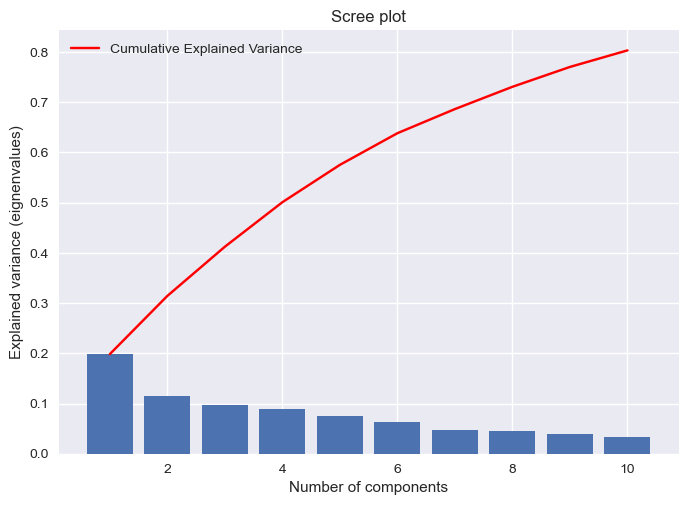

In [481]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

We have a complex dataframe, There is no clear break in the scree plot, so hard to say how many PC should be used.

<AxesSubplot:>

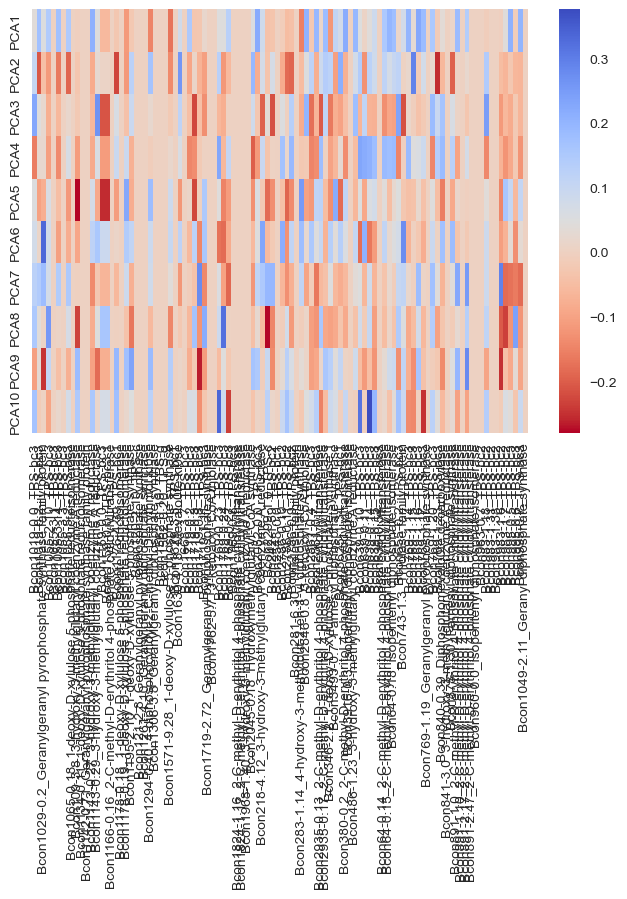

In [489]:
sns.heatmap(pca.components_,
                 cmap= "coolwarm_r",
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "vertical"})

We can plot the first two PCA (covering about 30% of the variation) to see if the species and tissues are separate.  We need to add back the labels.

In [482]:
Y.head(3)

,Rep,Species,Tissue
0,1,conchifolia,Female.flower
1,2,conchifolia,Female.flower
2,3,conchifolia,Female.flower


In [483]:
pca_df['Species'] = Y['Species']
pca_df['Tissue'] = Y['Tissue']

 
pca_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Species,Tissue
0,-1.976974,3.185635,-0.352406,-1.481022,0.538145,3.367364,0.914611,-1.185061,1.613960,0.372940,conchifolia,Female.flower
1,-1.935266,1.755464,0.793632,-1.310096,1.020663,-0.935524,0.289524,-0.151314,1.970179,-0.695924,conchifolia,Female.flower
2,-1.949342,2.126054,0.868043,-1.148039,0.539276,-0.772033,-0.156413,-0.696205,2.038374,-0.832186,conchifolia,Female.flower


And plot as scatterplot in seaborn

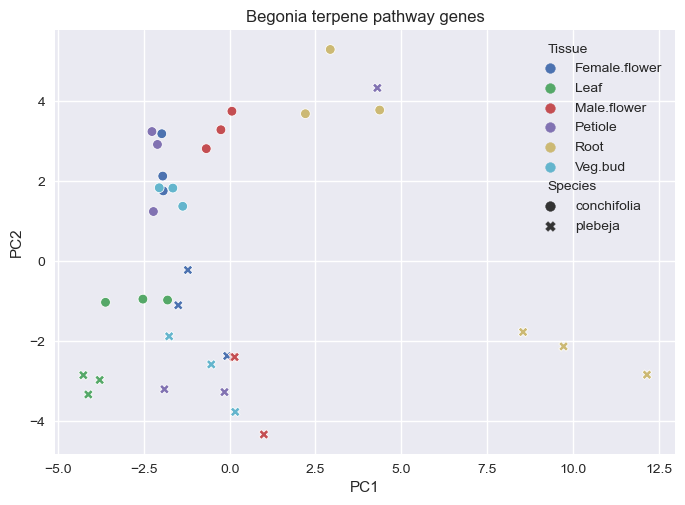

In [491]:
sns.scatterplot(x='PC1', 
                y='PC2',
                hue="Tissue",
                style="Species",
                data=pca_df)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('Begonia terpene pathway genes')
plt.show()

Pretty good separation of the species except for one point.  One replicate of the B. plebeja petioles looks alot like the terpene profile of a B. conchifolia root.  Is this seen in the other PC plots?  We have to move the legend out of the plot here.

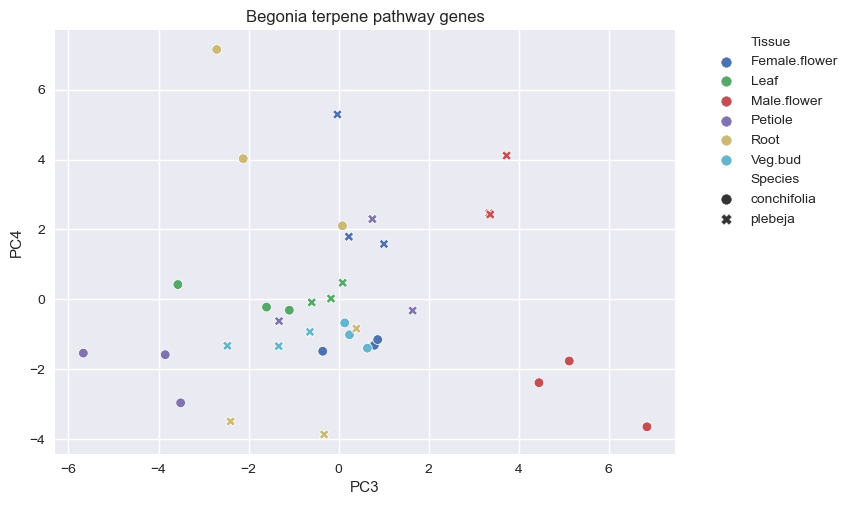

In [492]:
sns.scatterplot(x='PC3', 
                y='PC4',
                hue="Tissue",
                style="Species",
                data=pca_df)
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.title('Begonia terpene pathway genes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Species not so well separated here.

More explainations of PCA if all's still unclear:   

Basics: 
    
    https://setosa.io/ev/principal-component-analysis/   
    
Detail:  
    
    https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d 

Very brief example with a teapot:  

    https://youtu.be/BfTMmoDFXyE  

Fancier approaches to PCA visualisation are here:  

    https://plotly.com/python/pca-visualization/

Nice worked through example from cancer genetics here if you want to play more:
    
    https://realpython.com/k-means-clustering-python/#how-to-build-a-k-means-clustering-pipeline-in-python